In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

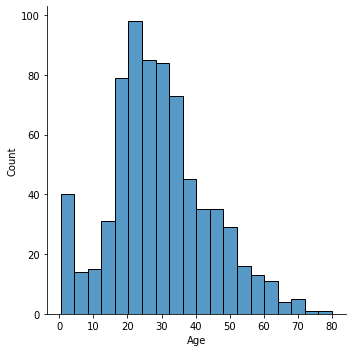

In [5]:
sns.displot(df['Age'].dropna())

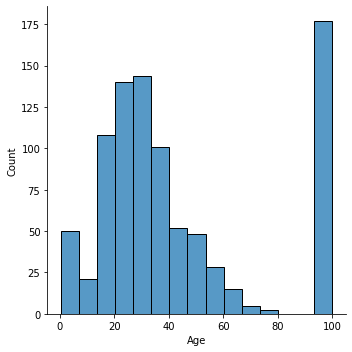

In [6]:
sns.displot(df['Age'].fillna(100))

### Guassian Distribution

<AxesSubplot:>

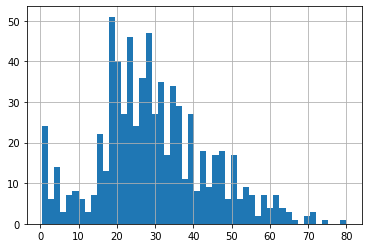

In [7]:
df['Age'].hist(bins=50)

<AxesSubplot:>

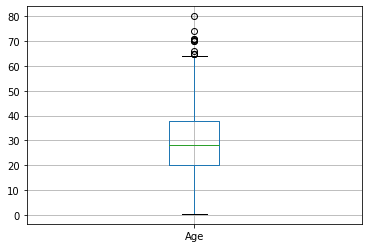

In [8]:
df.boxplot(column='Age')

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
upper_boundary = df['Age'].mean() + 3*df['Age'].std()
lower_boundary = df['Age'].mean() - 3*df['Age'].std()
print(upper_boundary,lower_boundary)

73.27860964406094 -13.880374349943303


In [11]:
df.loc[df['Age']>73,'Age']=73

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## If the data was skewed then we would have done following steps

In [13]:
IQR = df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
IQR

17.875

In [14]:
#range of values beyond which it is considered as outliers
lower_bridge=df['Age'].quantile(0.25)-(1.5*IQR)
upper_bridge=df['Age'].quantile(0.75)+(1.5*IQR)
print(lower_bridge,upper_bridge)

-6.6875 64.8125


In [15]:
#Extreme outliers
lower_bridge=df['Age'].quantile(0.25)-(3 * IQR)
upper_bridge=df['Age'].quantile(0.75)+(3 * IQR)
print(lower_bridge,upper_bridge)

-33.5 91.625


### Features is skewed 

<AxesSubplot:>

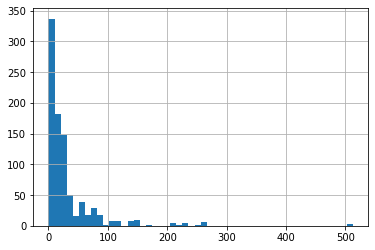

In [16]:
df['Fare'].hist(bins=50)

In [17]:
#right skewed

<AxesSubplot:>

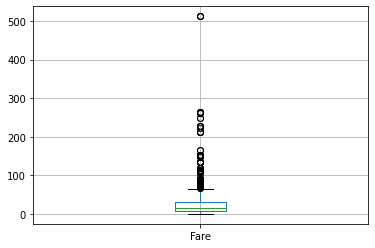

In [18]:
df.boxplot(column='Fare')

In [19]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
#when data set is skewed then we cannot gurantee the range
IQR = df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
IQR

23.0896

In [21]:
lower_bridge=df['Fare'].quantile(0.25)-(1.5*IQR)
upper_bridge=df['Fare'].quantile(0.75)+(1.5*IQR)
print(lower_bridge,upper_bridge)

-26.724 65.6344


In [22]:
#extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(3*IQR)
upper_bridge=df['Fare'].quantile(0.75)+(3*IQR)
print(lower_bridge,upper_bridge)

-61.358399999999996 100.2688


In [23]:
df.loc[df['Fare']>100,'Fare']=100

In [24]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size=0.3)

In [26]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred1=classifier.predict_proba(x_test)

In [32]:
from sklearn.metrics import accuracy_score,roc_auc_score
print('accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

accuracy_score: 0.6529850746268657
roc_auc_score: 0.6941071428571428


In [34]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred1=classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

accuracy_score: 0.6716417910447762
roc_auc_score: 0.693095238095238
